In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)

In [2]:
cases = pd.read_csv('WHO-COVID-19-global-data-2.csv')

In [3]:
cases

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
102891,2021-03-09,ZW,Zimbabwe,AFRO,18,36289,2,1487
102892,2021-03-10,ZW,Zimbabwe,AFRO,32,36321,2,1489
102893,2021-03-11,ZW,Zimbabwe,AFRO,20,36341,0,1489
102894,2021-03-12,ZW,Zimbabwe,AFRO,36,36377,3,1492


In [4]:
cases = cases[['Date_reported','Country','New_cases','Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]

In [5]:
cases

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-01-04,Afghanistan,0,0,0,0
2,2020-01-05,Afghanistan,0,0,0,0
3,2020-01-06,Afghanistan,0,0,0,0
4,2020-01-07,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
102891,2021-03-09,Zimbabwe,18,36289,2,1487
102892,2021-03-10,Zimbabwe,32,36321,2,1489
102893,2021-03-11,Zimbabwe,20,36341,0,1489
102894,2021-03-12,Zimbabwe,36,36377,3,1492


In [6]:
country_filter = cases['Country'] == "Germany"

In [7]:
cases = cases[country_filter]

In [8]:
cases

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
34008,2020-01-03,Germany,0,0,0,0
34009,2020-01-04,Germany,0,0,0,0
34010,2020-01-05,Germany,0,0,0,0
34011,2020-01-06,Germany,0,0,0,0
34012,2020-01-07,Germany,0,0,0,0
...,...,...,...,...,...,...
34439,2021-03-09,Germany,4252,2509445,255,72189
34440,2021-03-10,Germany,9146,2518591,300,72489
34441,2021-03-11,Germany,14356,2532947,321,72810
34442,2021-03-12,Germany,12834,2545781,252,73062


In [9]:
date = cases['Date_reported'].values
deats_by_day = cases['New_deaths'].values
cases_by_day = cases['New_cases'].values

In [10]:
number_of_items = len(date)
days = np.arange(1, number_of_items+1)

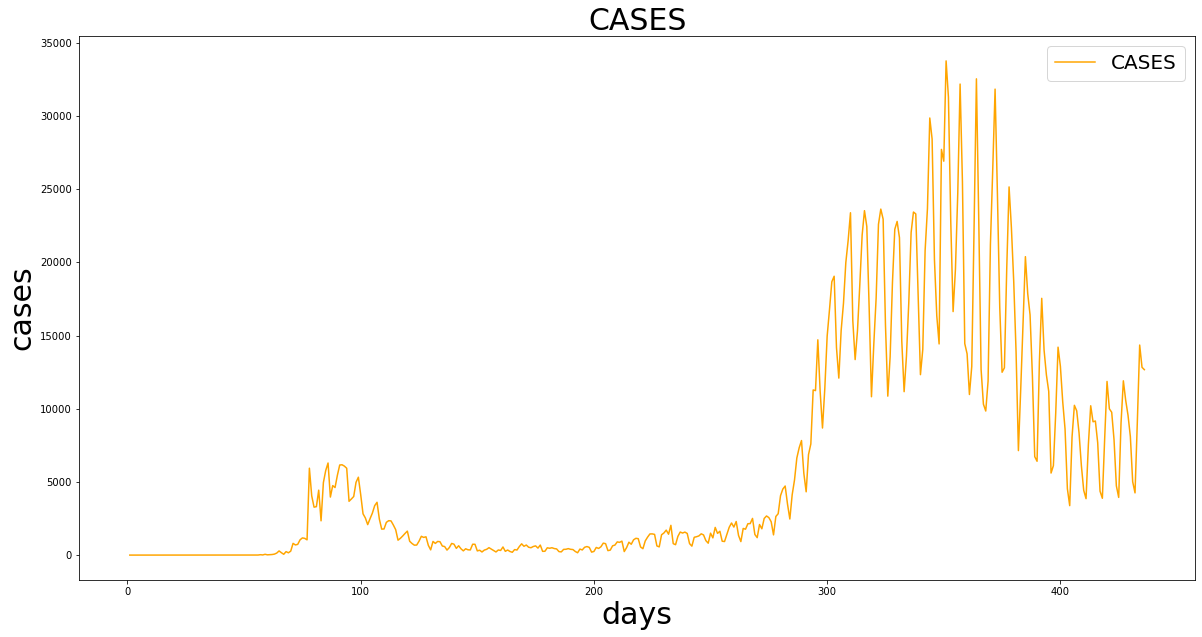

In [11]:
plt.plot(days, cases_by_day, label="CASES", color="orange")
plt.title("CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

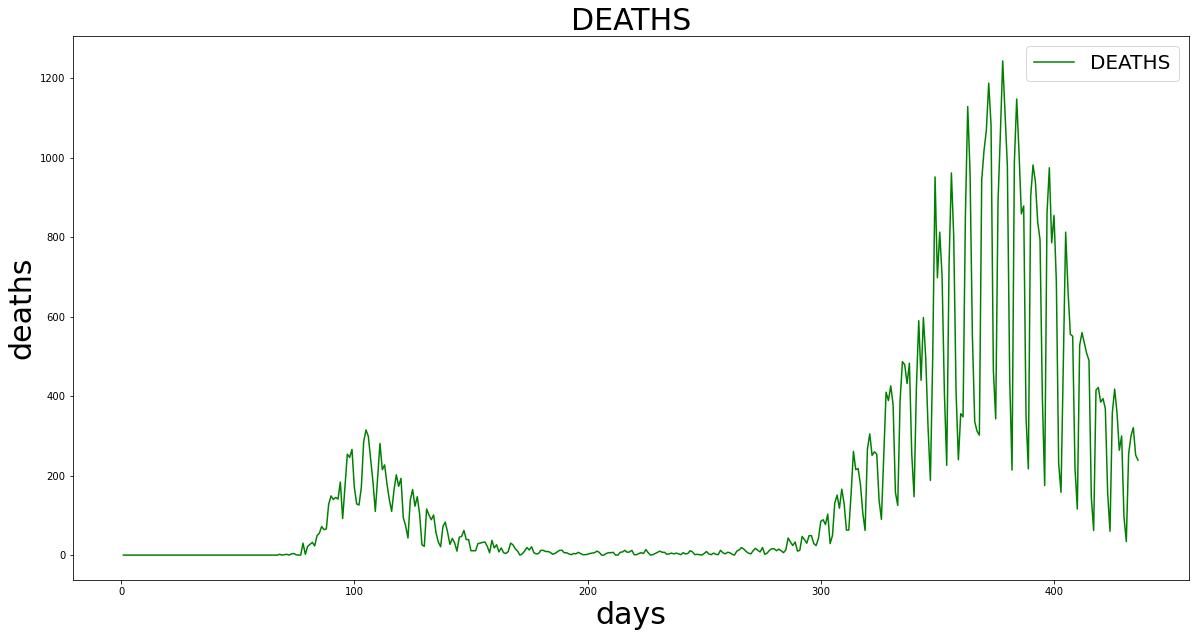

In [12]:
plt.plot(days, deats_by_day, label="DEATHS", color="green")
plt.title("DEATHS", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("deaths", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

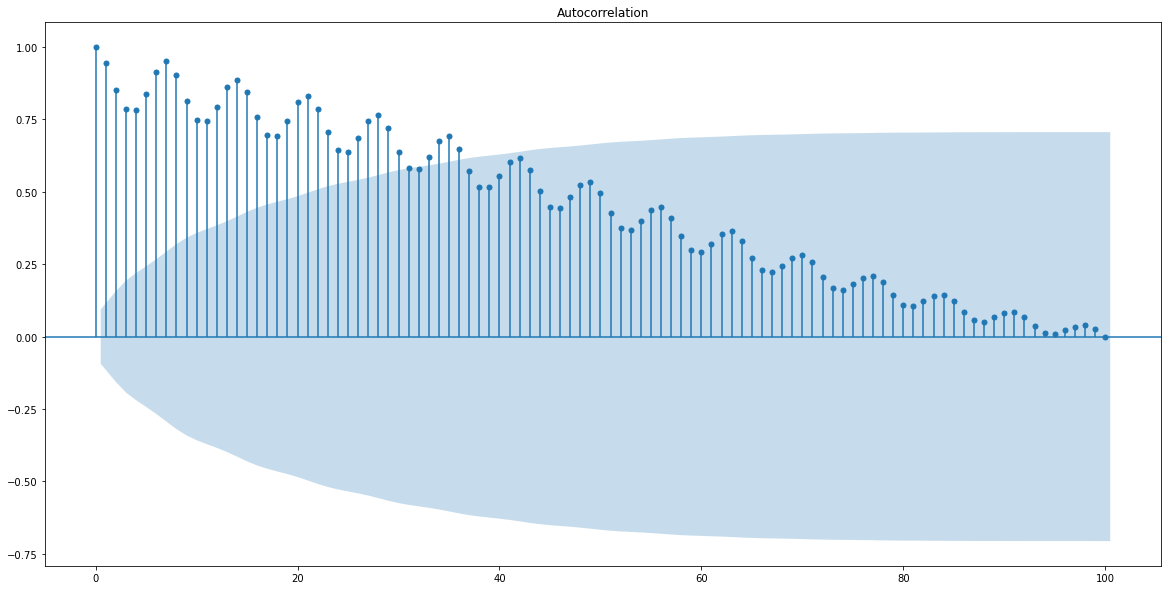

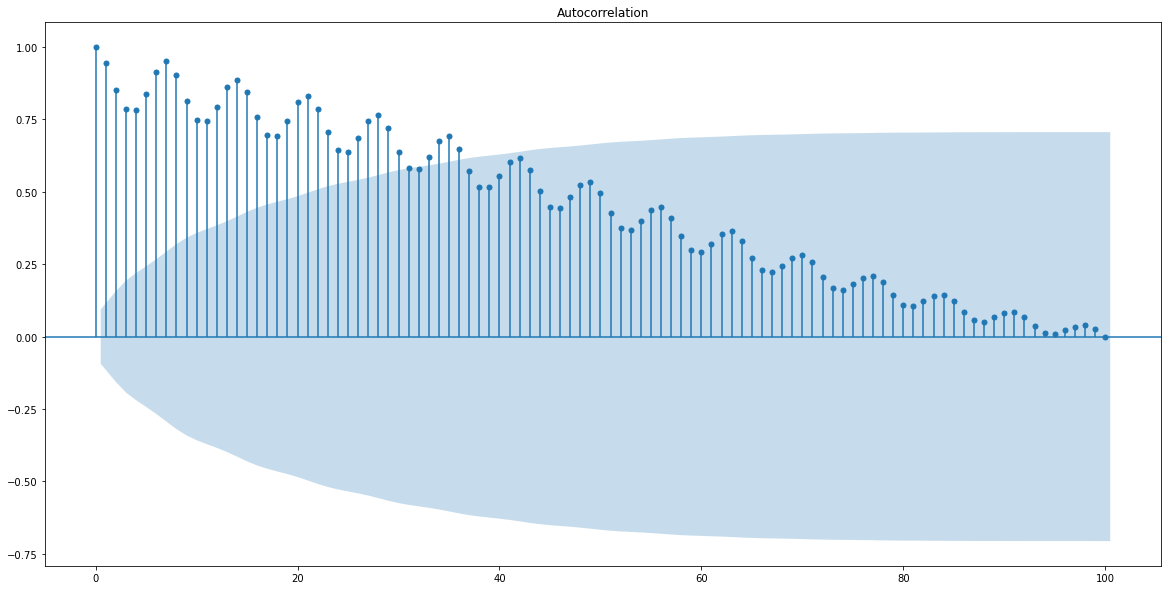

In [14]:
plot_acf(cases_by_day, lags=100)

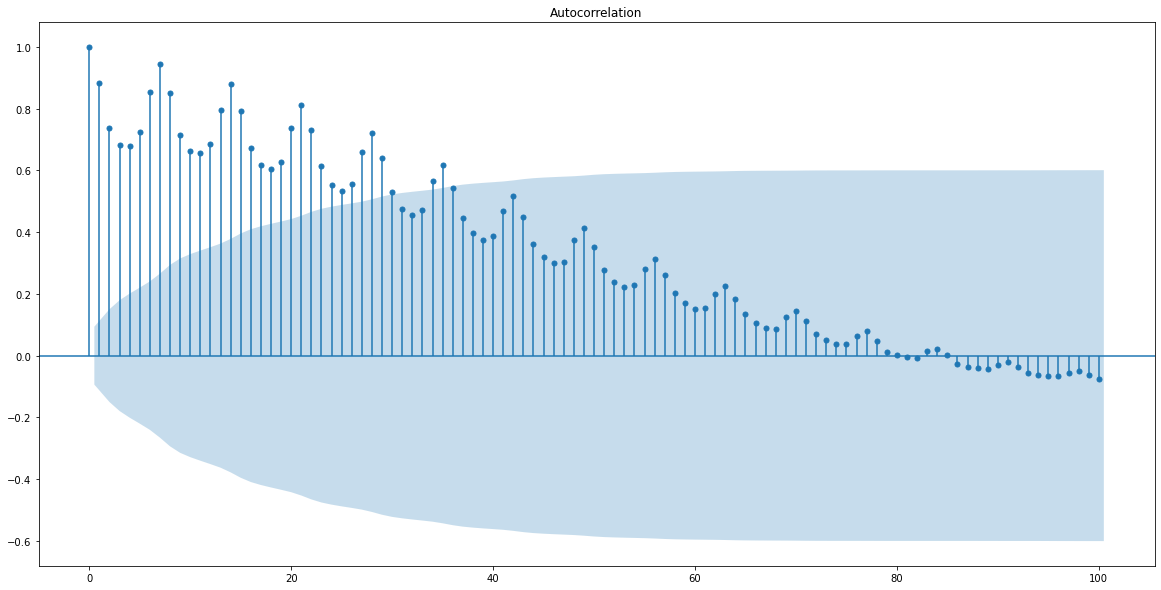

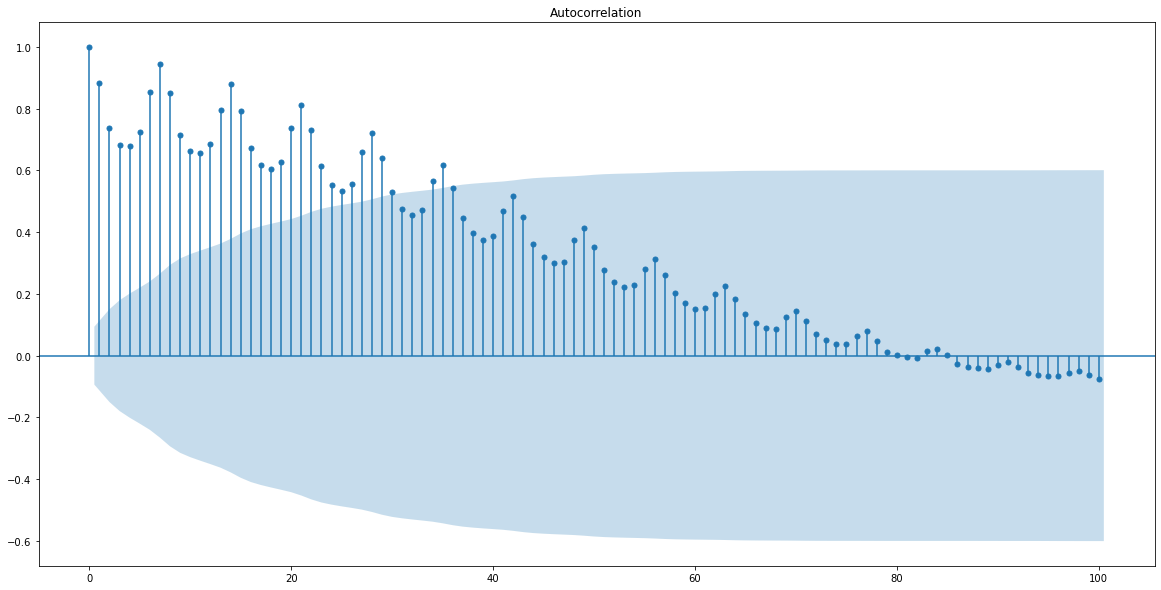

In [15]:
plot_acf(deats_by_day, lags=100)

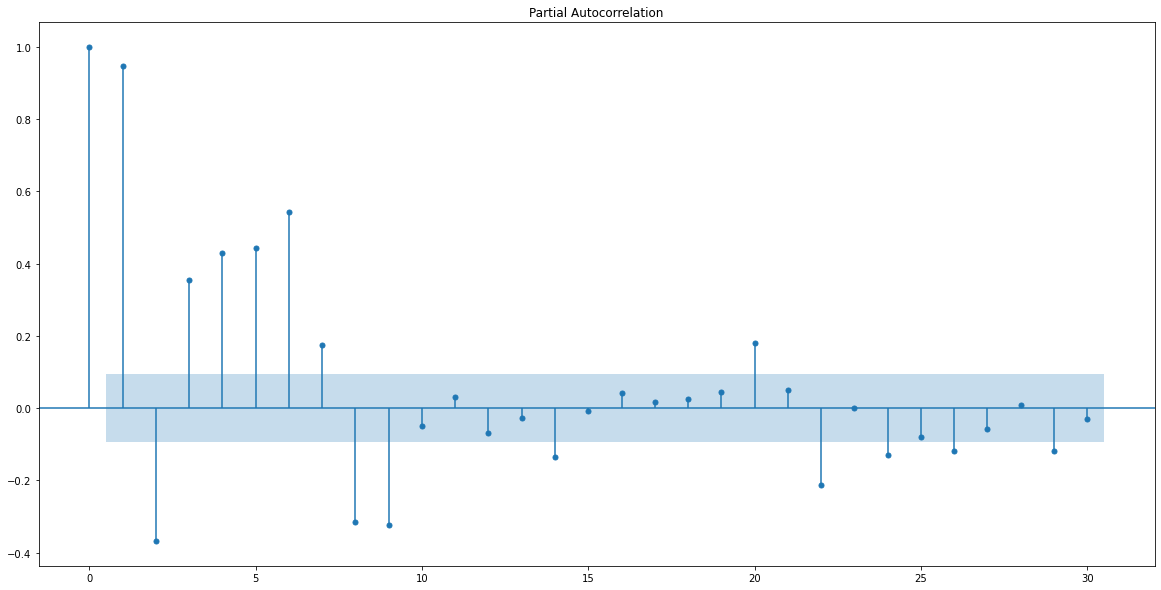

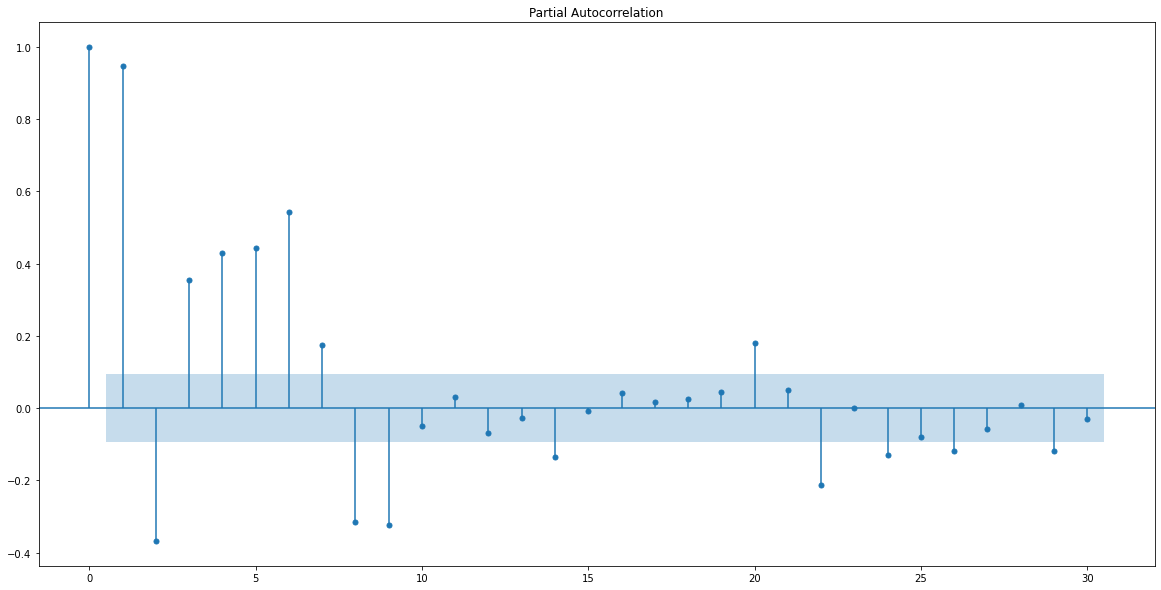

In [16]:
plot_pacf(cases_by_day, lags=30)

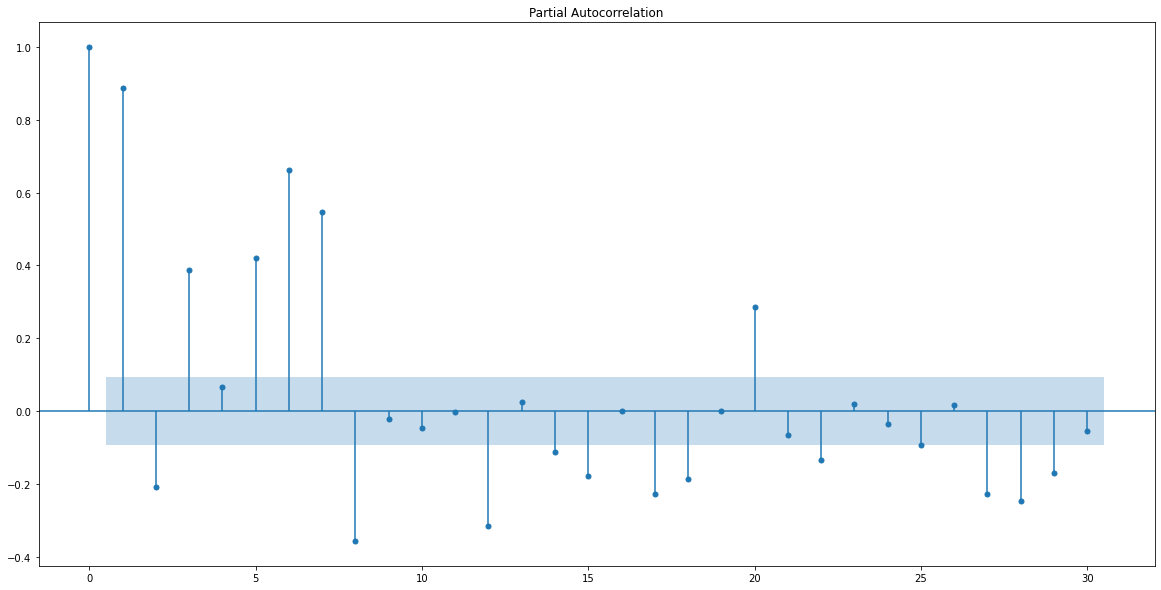

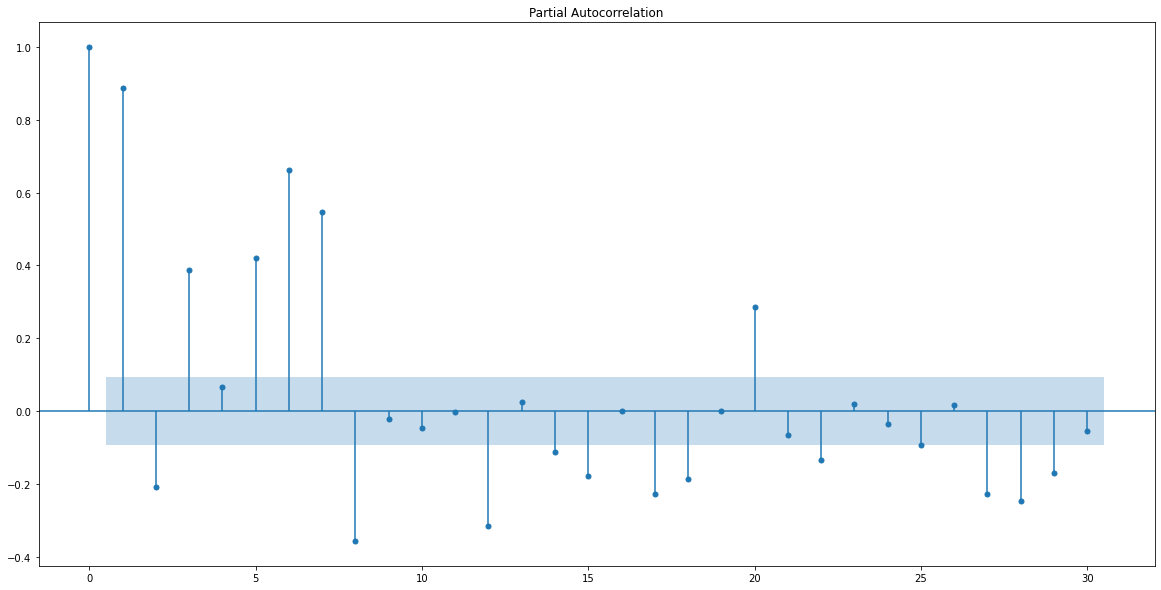

In [17]:
plot_pacf(deats_by_day, lags=30)

In [18]:
starting_from_first_case = cases_by_day[25:]
lag_1_case = starting_from_first_case[1:]

In [19]:
lag_1_case=starting_from_first_case[:len(starting_from_first_case)-1] - lag_1_case

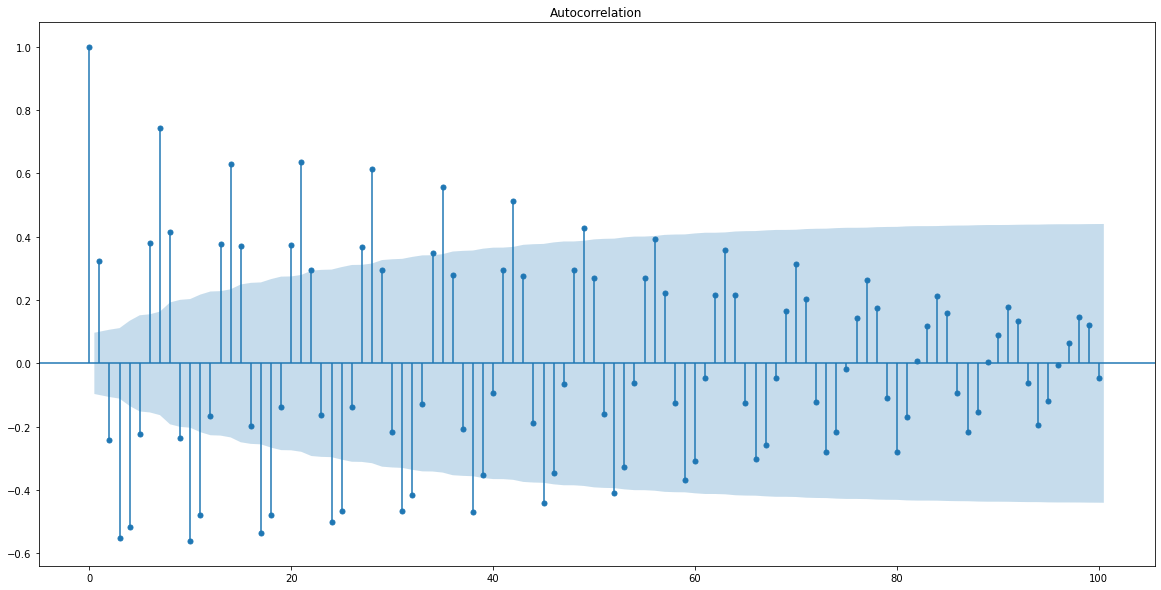

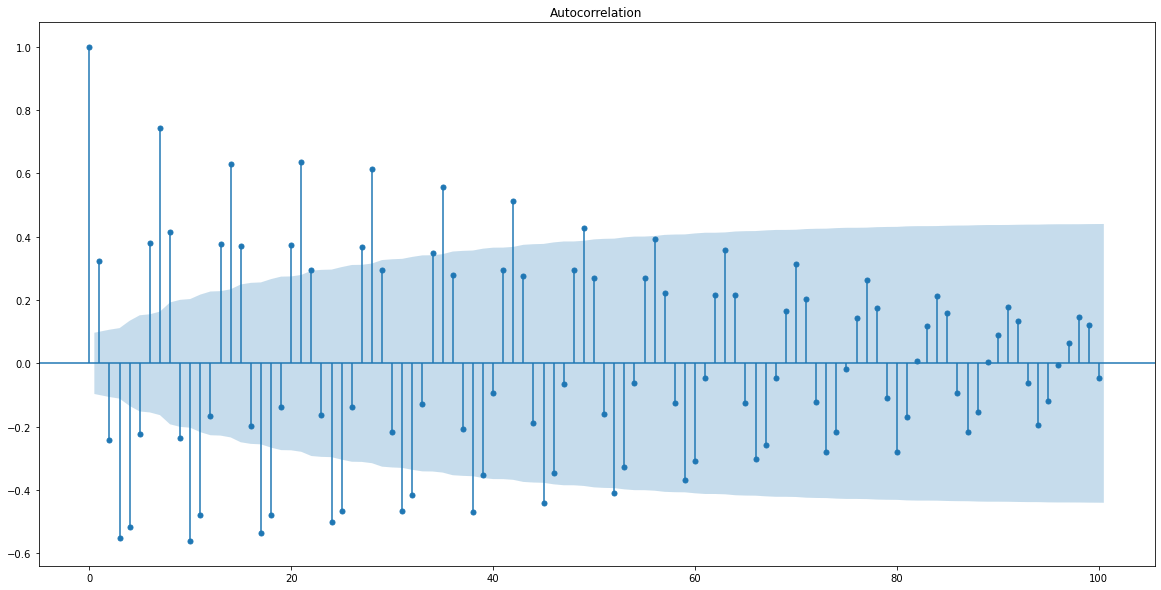

In [20]:
plot_acf(lag_1_case, lags=100)

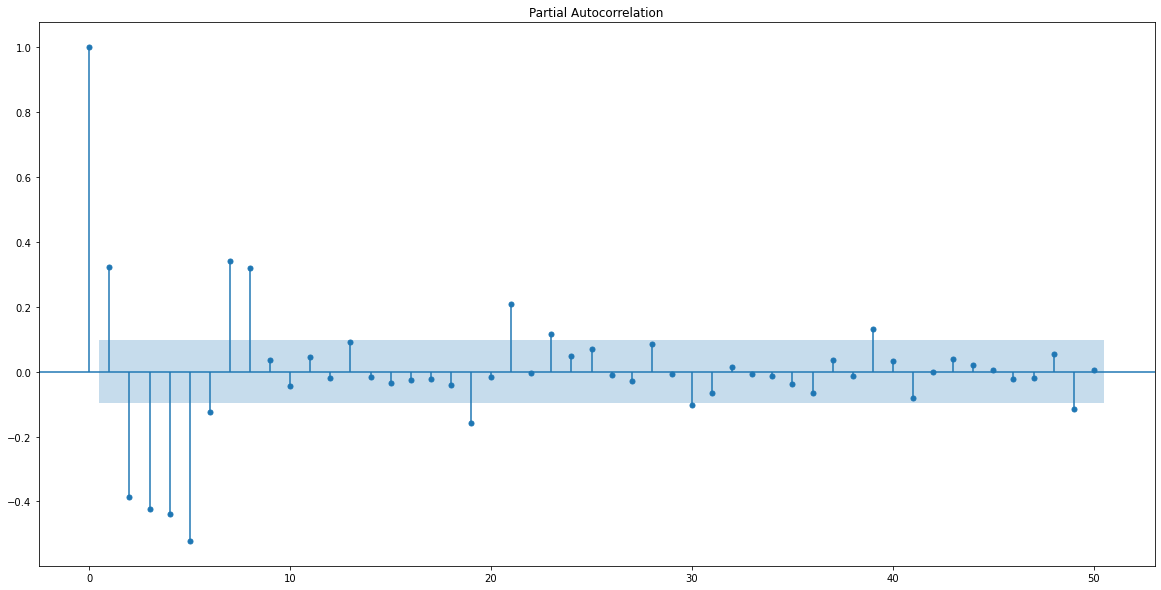

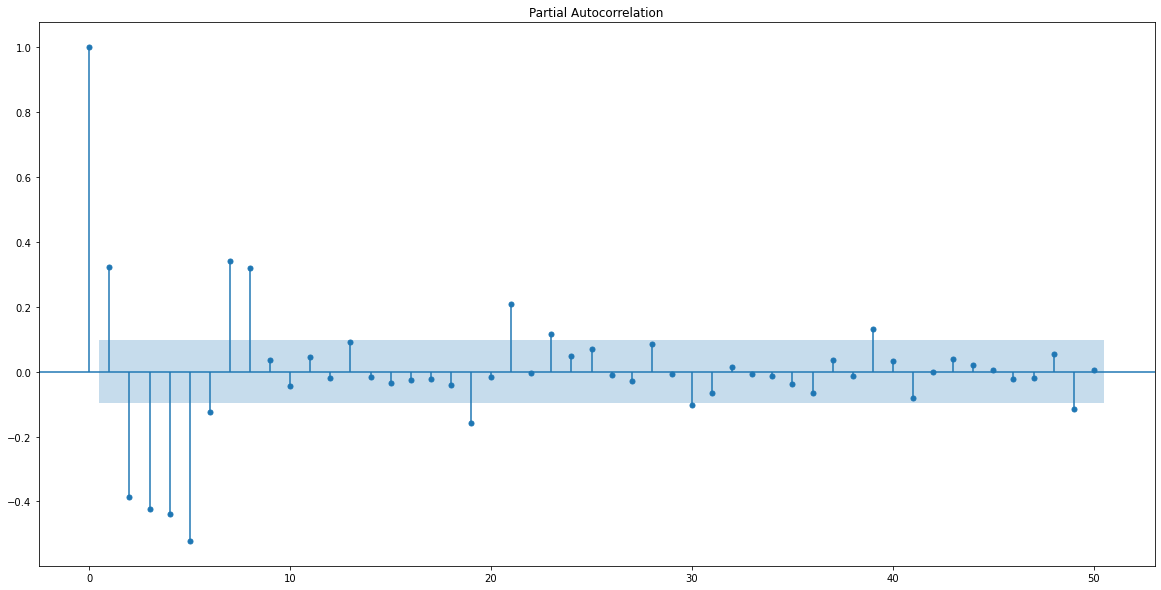

In [21]:
plot_pacf(lag_1_case, lags=50)

In [22]:
lag_7_case = starting_from_first_case[7:]
lag_7_case=starting_from_first_case[:len(starting_from_first_case)-7] - lag_7_case

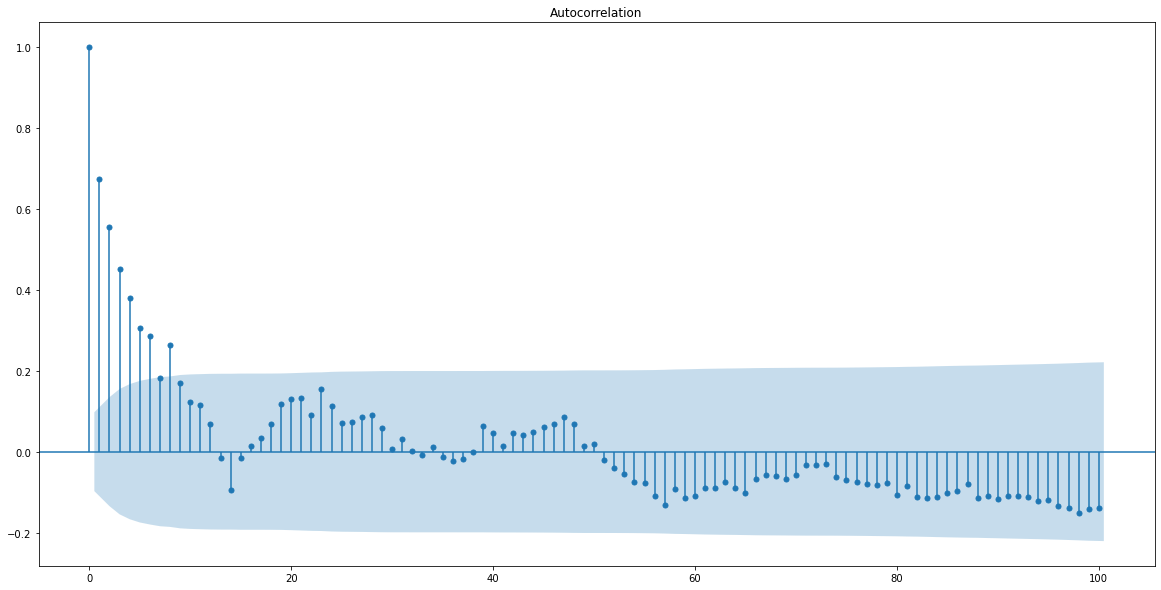

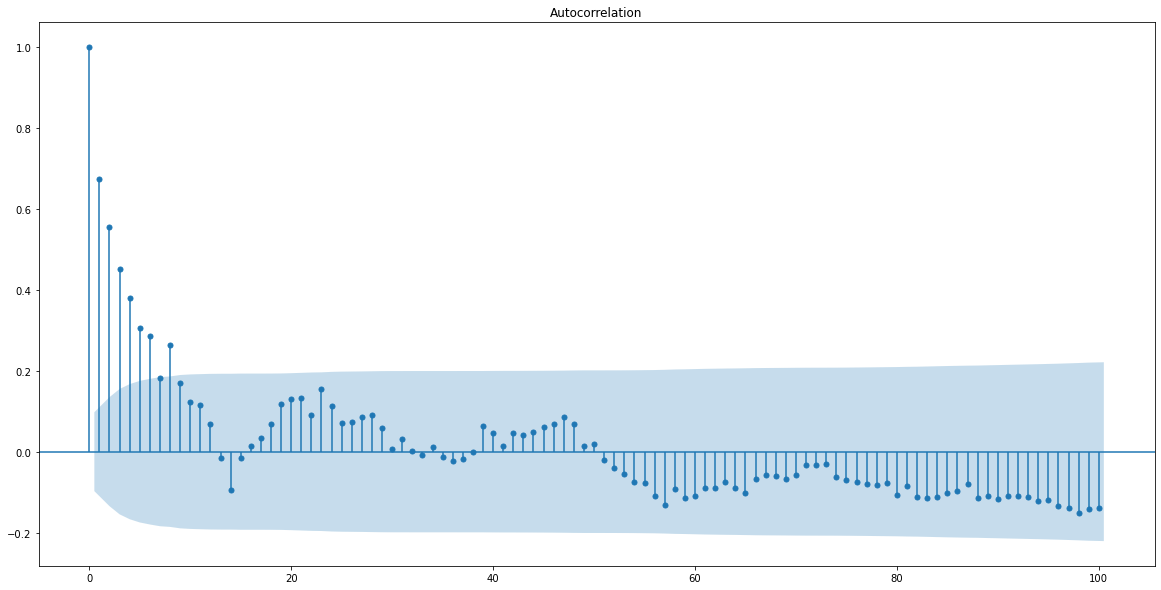

In [23]:
plot_acf(lag_7_case, lags=100)

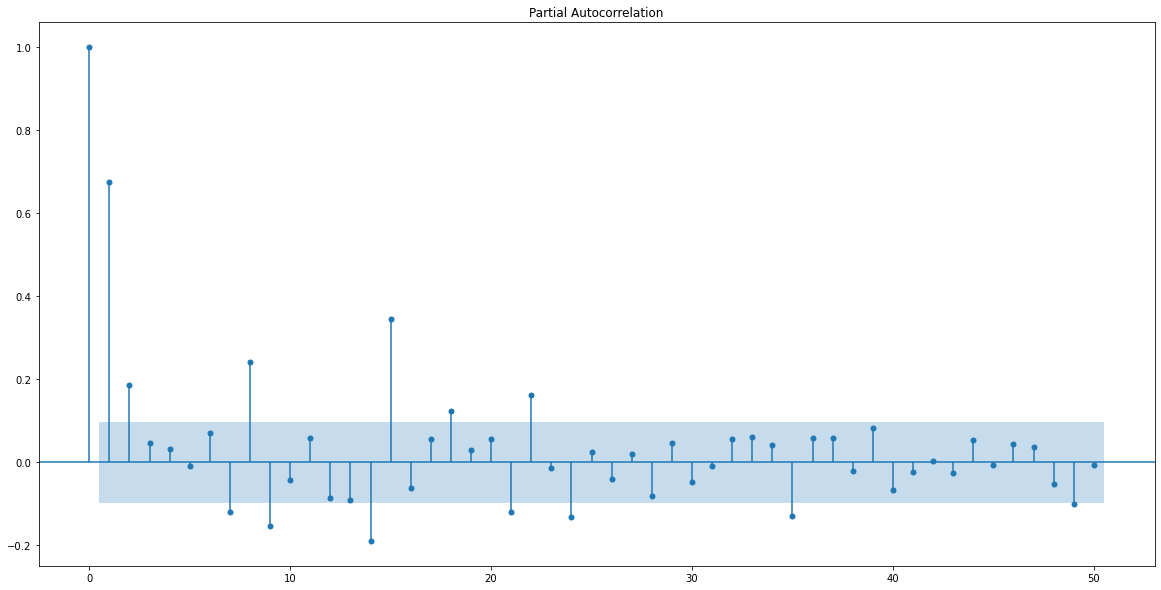

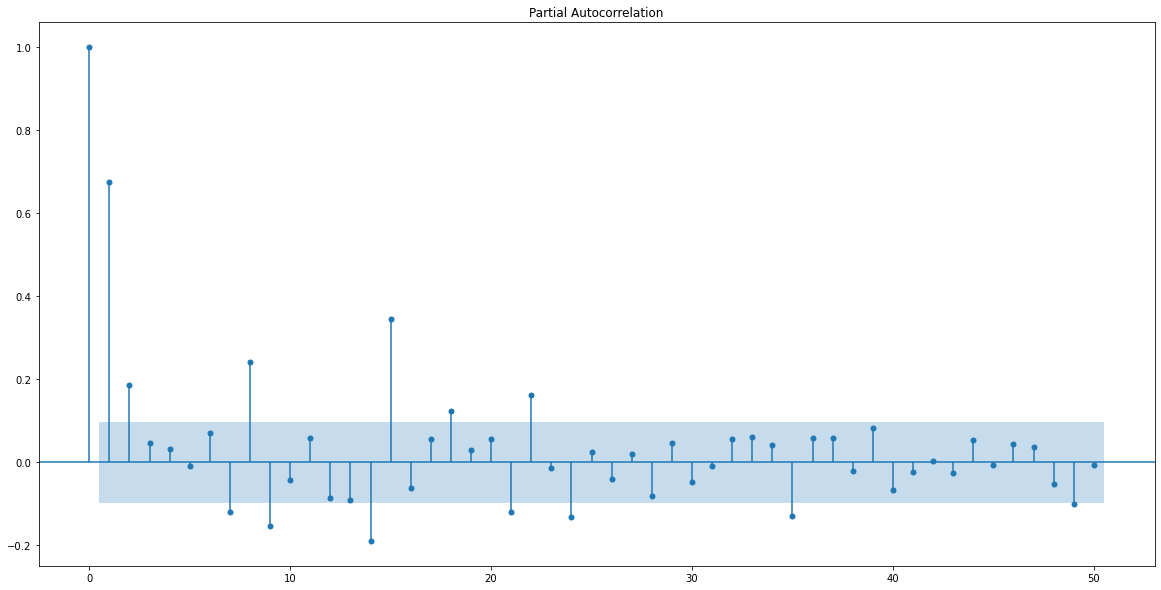

In [24]:
plot_pacf(lag_7_case, lags=50)

In [25]:
lag_1_7_case = lag_1_case[7:]
lag_1_7_case=lag_1_case[:len(lag_1_case)-7] - lag_1_7_case

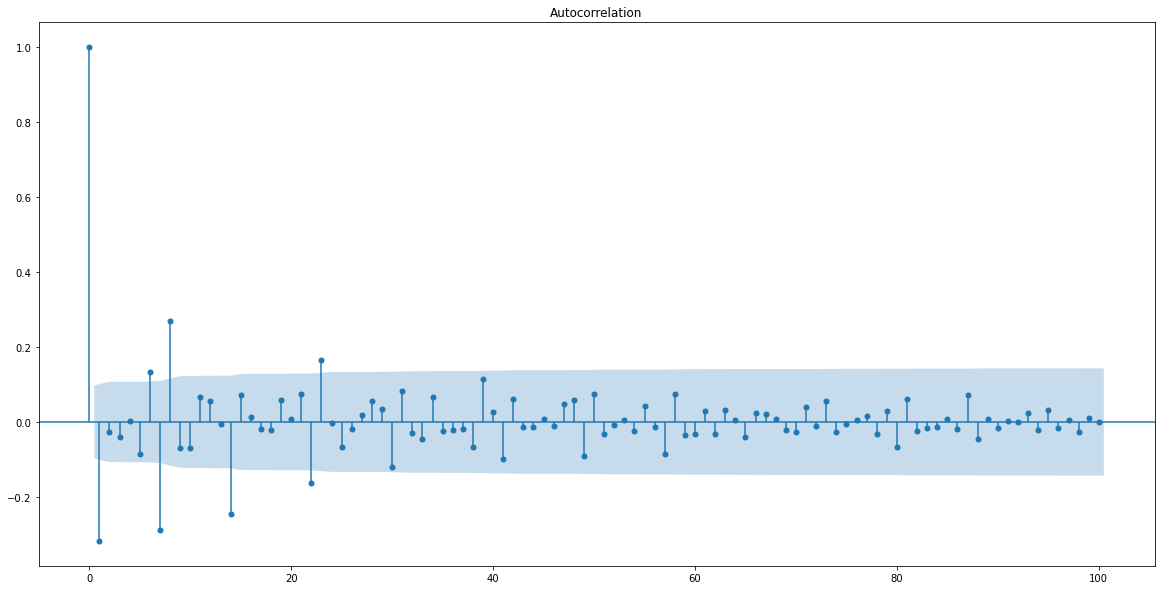

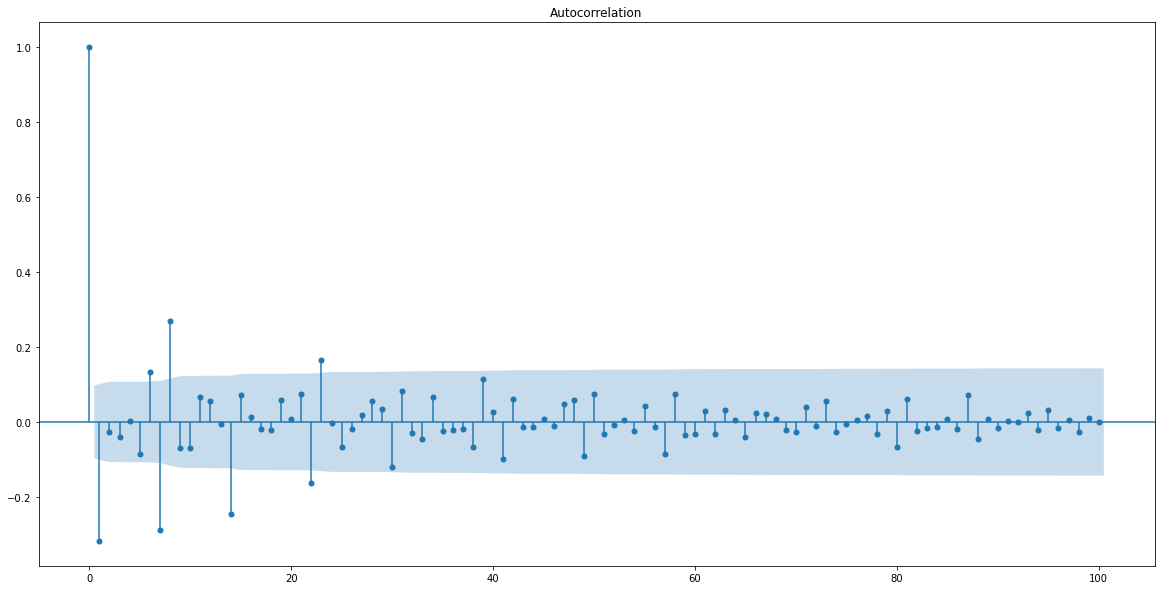

In [26]:
plot_acf(lag_1_7_case, lags=100)

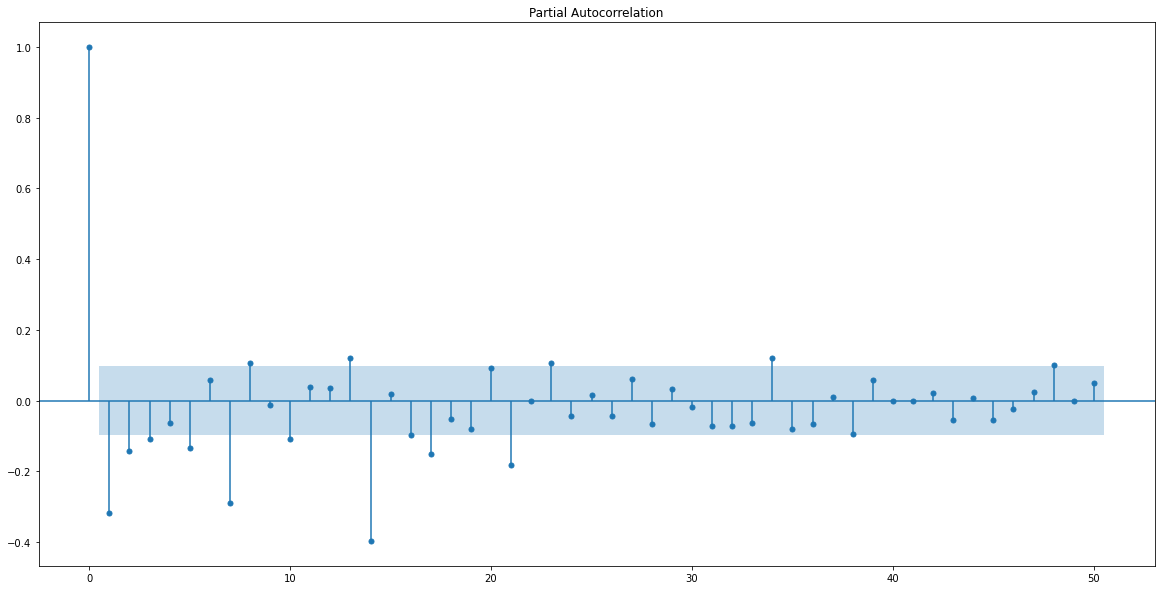

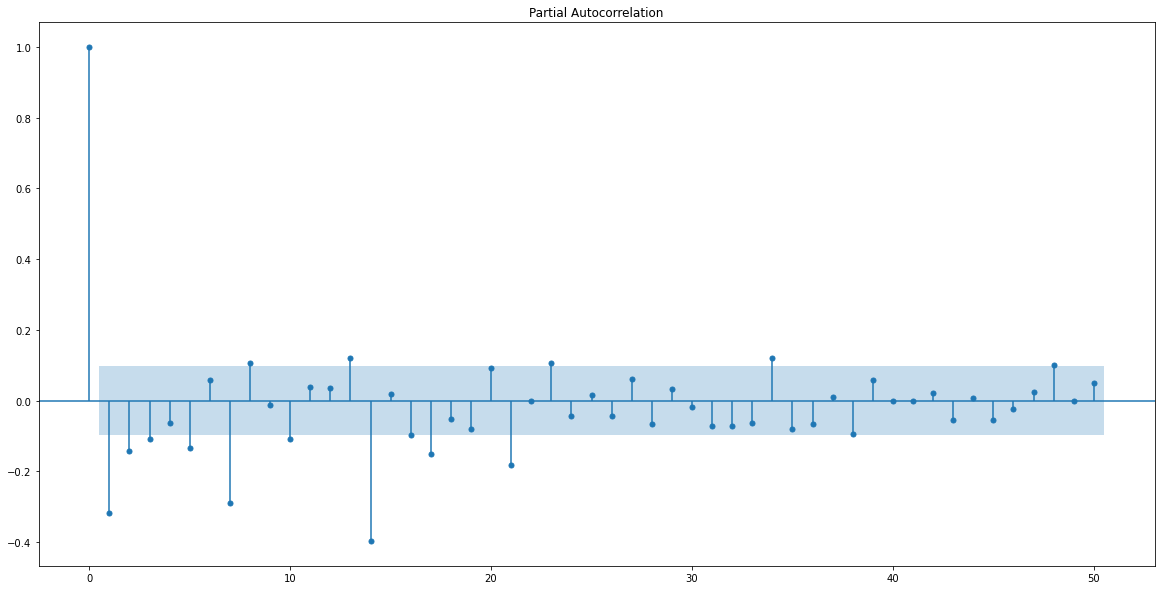

In [27]:
plot_pacf(lag_1_7_case, lags=50)

In [28]:
starting_from_first_death = deats_by_day[67:]
lag_7_death = starting_from_first_death[7:]
lag_7_death=starting_from_first_death[:len(starting_from_first_death)-7] - lag_7_death

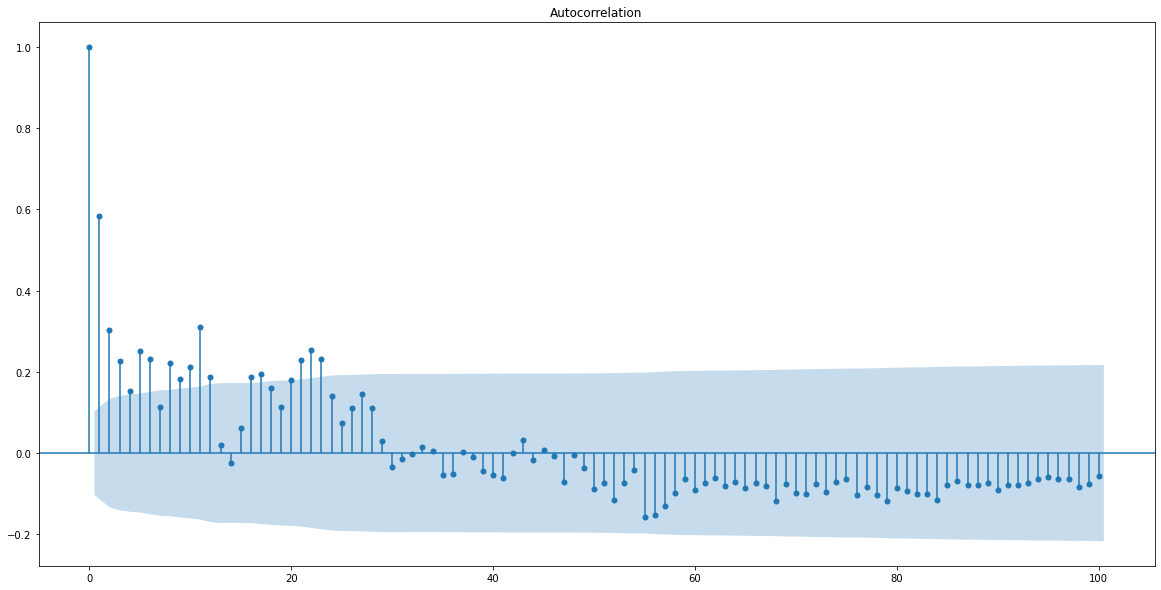

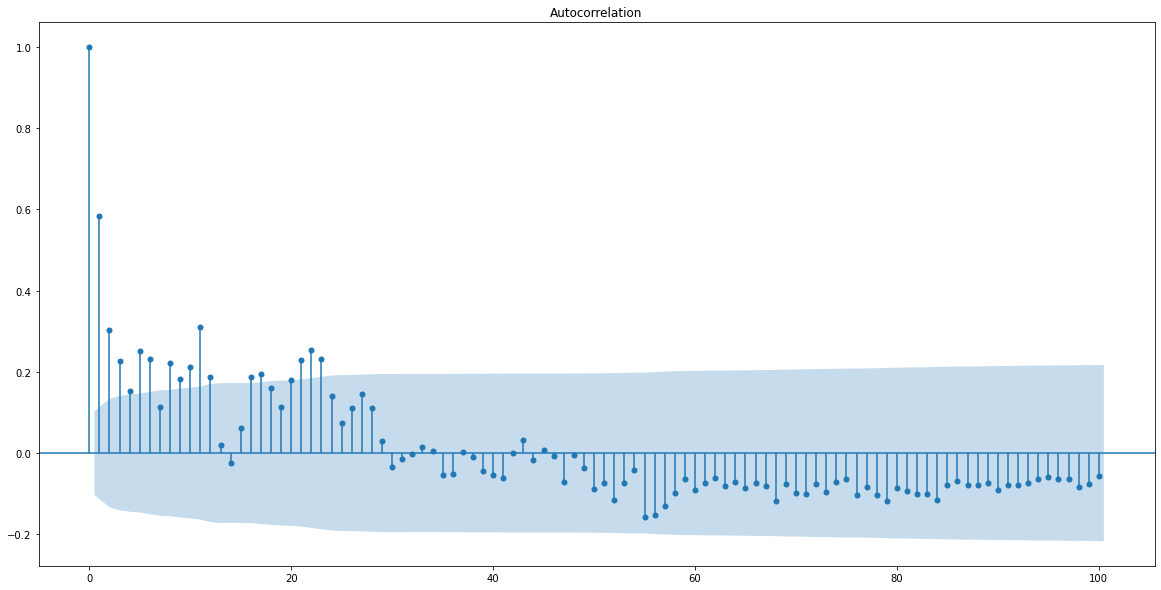

In [29]:
plot_acf(lag_7_death, lags=100)

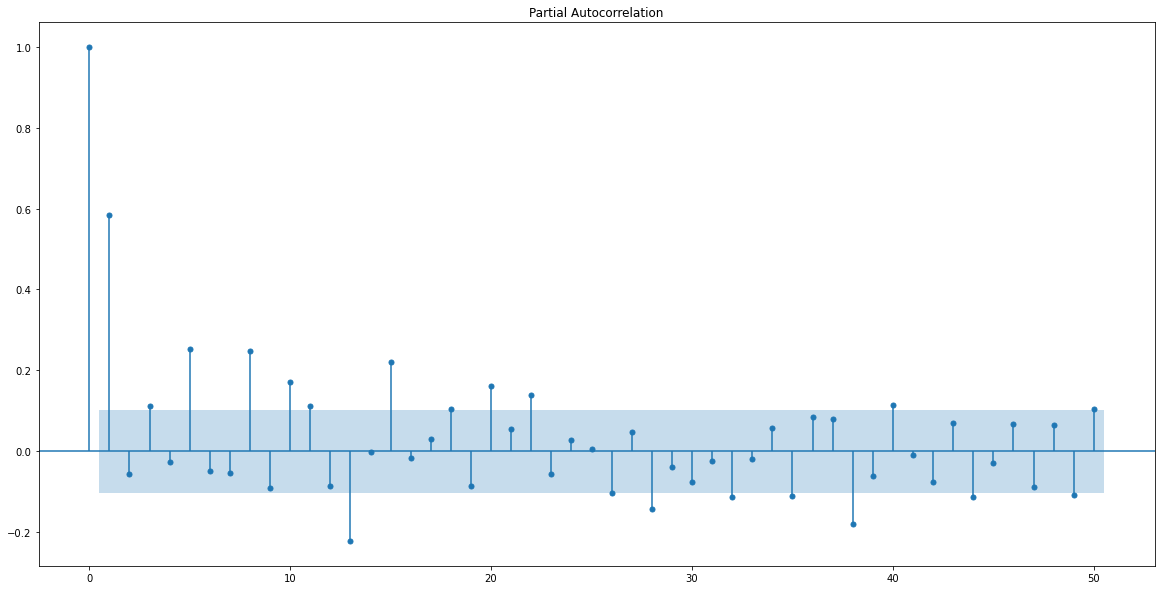

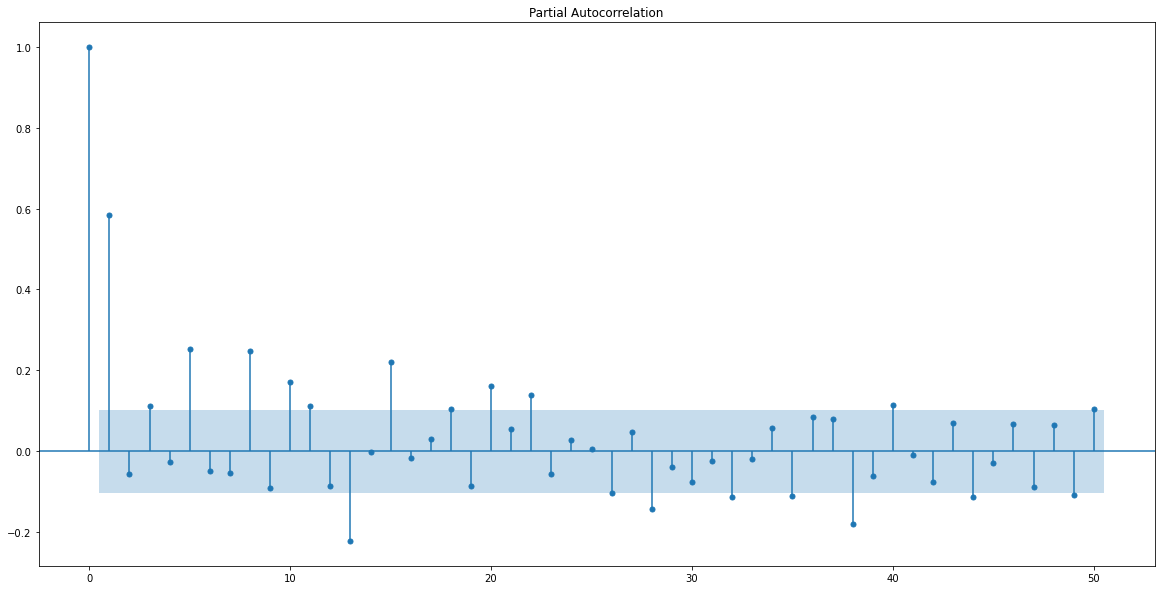

In [30]:
plot_pacf(lag_7_death, lags=50)

In [31]:
starting_from_first_death = deats_by_day[67:]
lag_1_death = starting_from_first_death[1:]
lag_1_death=starting_from_first_death[:len(starting_from_first_death)-1] - lag_1_death

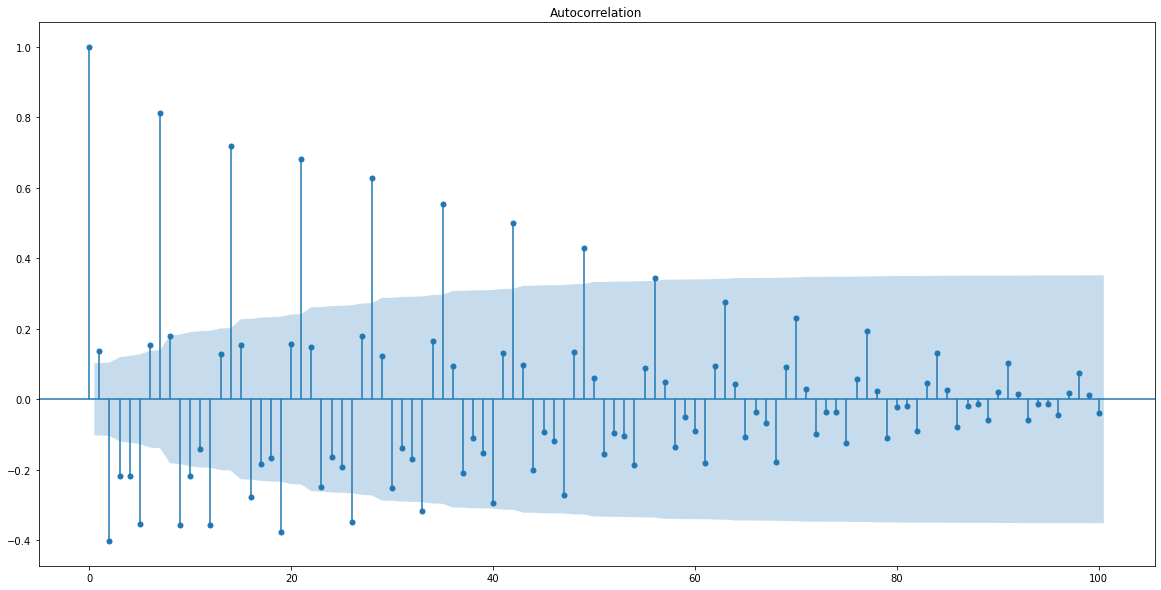

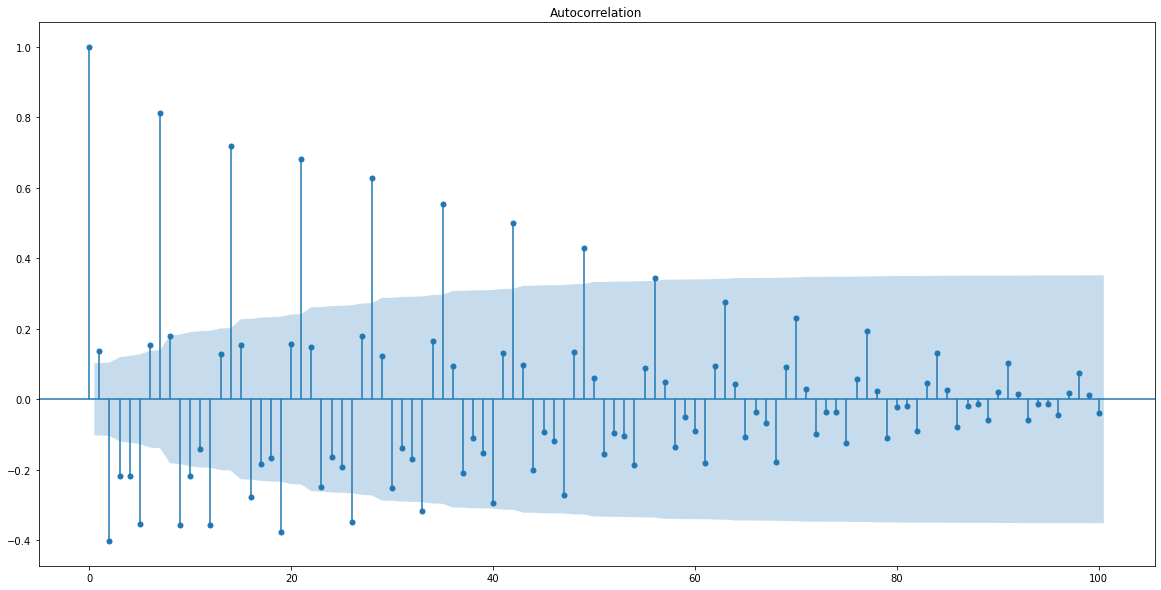

In [32]:
plot_acf(lag_1_death, lags=100)

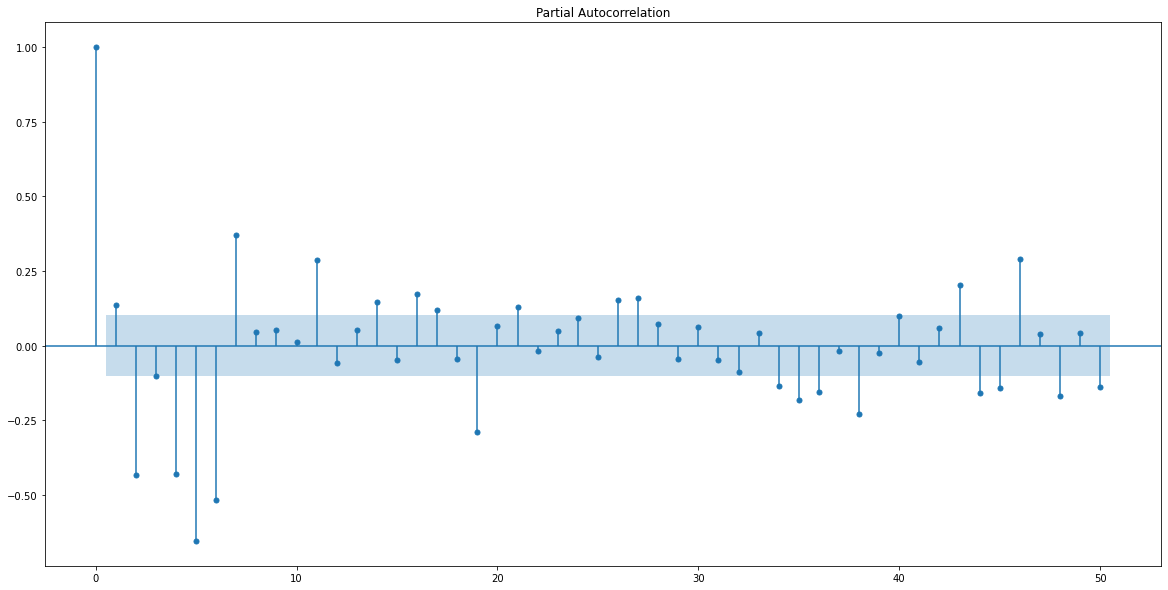

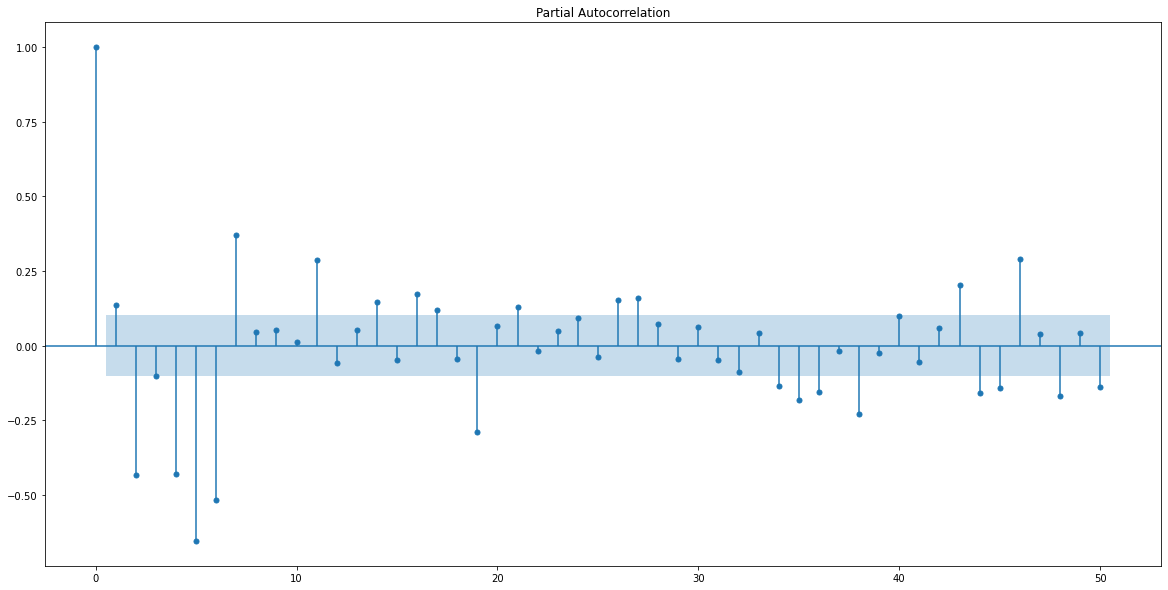

In [33]:
plot_pacf(lag_1_death, lags=50)

In [34]:
slicing_point = int(len(lag_7_case)*0.8)

In [35]:
train_data = lag_7_case[:slicing_point]
test_data = lag_7_case[slicing_point:]

In [37]:
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

model = ARIMA(train_data, order=(3,0,0))
model_fit = model.fit()

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  323
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2651.405
Date:                Sun, 14 Mar 2021   AIC                           5312.809
Time:                        00:34:56   BIC                           5331.698
Sample:                             0   HQIC                          5320.349
                                - 323                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -553.1301    605.303     -0.914      0.361   -1739.502     633.242
ar.L1          0.3449      0.040      8.710      0.000       0.267       0.422
ar.L2          0.5055      0.033     15.217      0.000       0.440       0.571
ar.L3          0.0356      0.037      0.956      0.339      -0.037       0.109
sigma2      7.931e+05   3.55e+04     22.317      0.000    7.23e+05    8.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               709.97
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.84   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
start = len(train_data) 
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start, end)

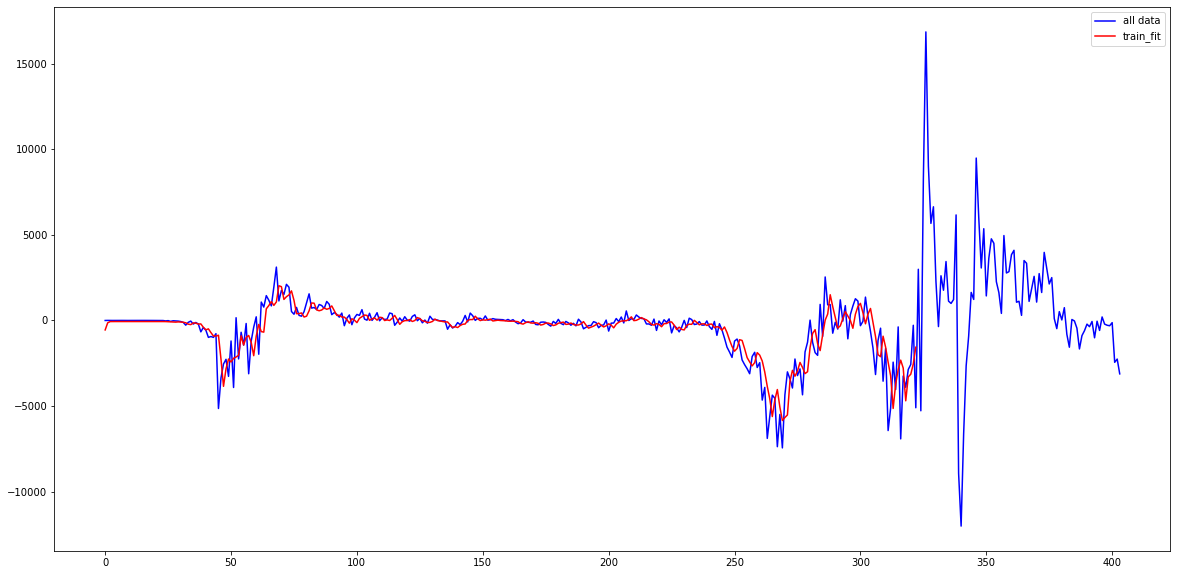

In [40]:
plt.plot(lag_7_case, color = "blue", label= "all data")
plt.plot(model_fit.fittedvalues, color='red', label="train_fit")
plt.legend()

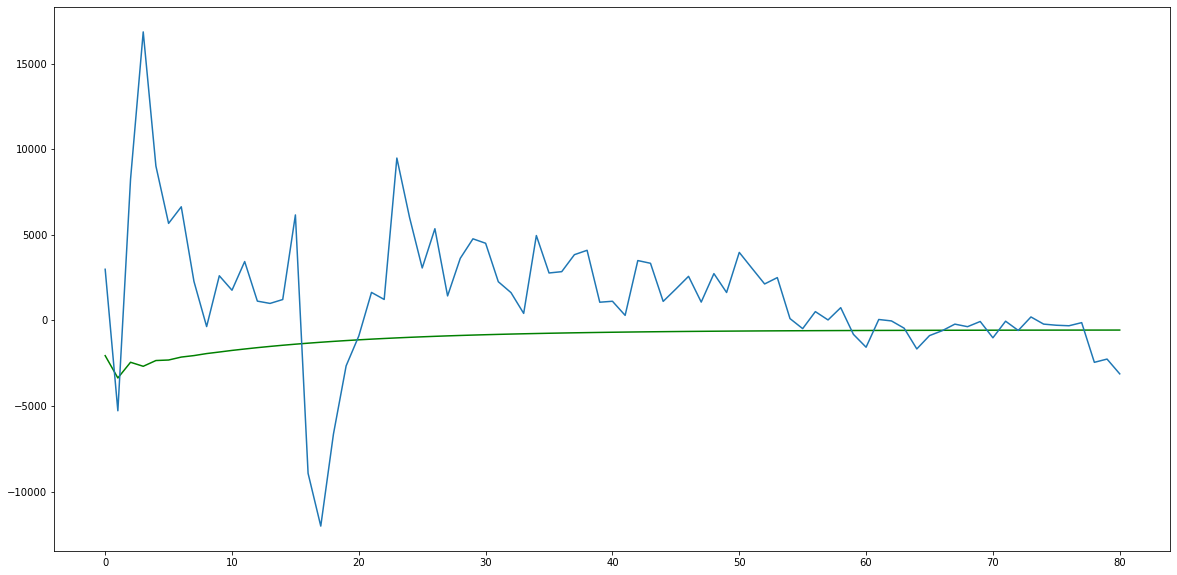

In [41]:
plt.plot(predictions, color='green', label="test_fit")
plt.plot(test_data)

In [42]:
model_2 = ARIMA(train_data, order=(1,0,0))
model_fit_2 = model_2.fit()

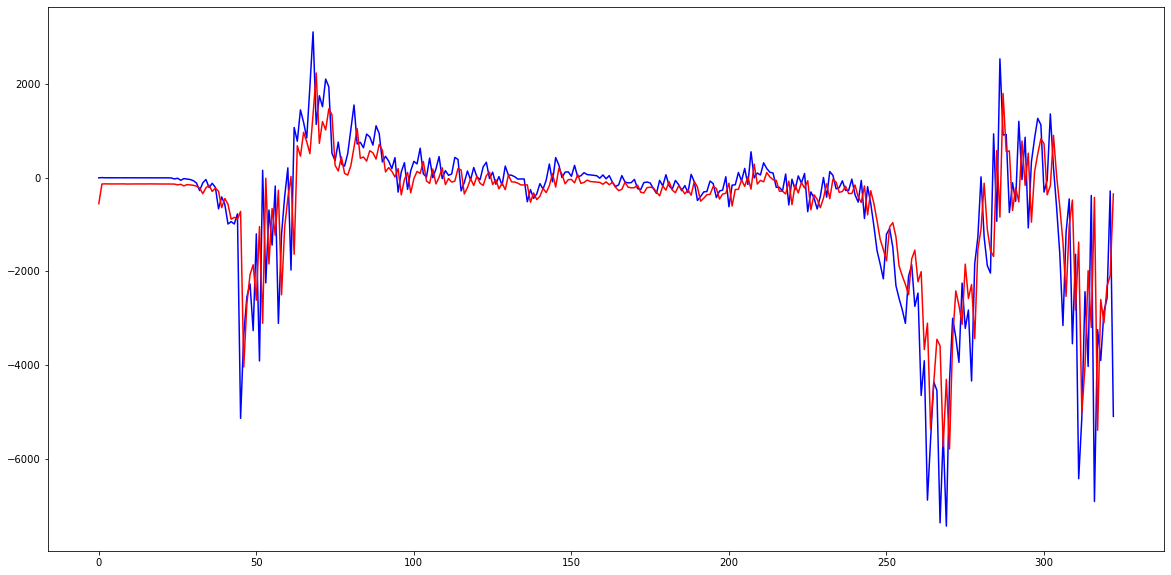

In [43]:
plt.plot(train_data, color = "blue")
plt.plot(model_fit_2.fittedvalues, color='red')

In [44]:
start = len(train_data) 
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start, end)